In [58]:
import numpy as np
import pandas as pd

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score
import statsmodels.api as sm



In [2]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (TADEO)

EPH_T1=pd.read_excel("/Users/tadeo/Downloads/BASE NORMALIZADA.xlsx")

In [60]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (PABLO)

EPH_T1=pd.read_excel("C:/Users/Computador/Desktop/Facultad/Big Data/TP4/BASE NORMALIZADA.xlsx")

In [ ]:
# IMPORTO LA LIBRERIA Y LOS ARCHIVOS (LEANDRO)

EPH_T1=pd.read_excel("/Users/HP/Desktop/Bases de datos tp4/BASE NORMALIZADA.xlsx")

# Afino las bases de datos a utilizar

In [62]:
EPH_T1.drop('Unnamed: 0', axis=1, inplace=True)

In [64]:
EPH_T1=EPH_T1[EPH_T1['REGION']==43]

In [66]:
EPH_T1["ESTADO"].fillna(0, inplace=True)


norespondieron=EPH_T1[EPH_T1['ESTADO'] == 0]


respondieron=EPH_T1[EPH_T1['ESTADO'] != 0]
respondieron["desocupado"] = respondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
norespondieron["desocupado"] = norespondieron["ESTADO"].apply(lambda x: 1 if x == 2 else 0)
respondieron["PET"] = respondieron["CH06"].apply(lambda x: 1 if 15 <= x <= 65 else 0)
respondieron["PEA"] = respondieron["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)

C:\Users\Computador\AppData\Local\Temp\ipykernel_5336\3369253291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  EPH_T1["ESTADO"].fillna(0, inplace=True)
C:\Users\Computador\AppData\Local\Temp\ipykernel_5336\3369253291.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron[

# A) Enfoque de validación

In [85]:
nor_04=norespondieron[norespondieron['ANO4']==2004]
nor_24=norespondieron[norespondieron['ANO4']==2024]
resp_04=respondieron[respondieron['ANO4']==2004]
resp_24=respondieron[respondieron['ANO4']==2024]

In [87]:
x04=resp_04.copy().drop(['desocupado', 'ESTADO'], axis=1)
y04=resp_04['desocupado']

# Split de testeo para 2004
X04_train, X04_test, y04_train, y04_test = train_test_split(x04, y04, test_size=0.3, random_state=444)

x24=resp_24.copy().drop(['desocupado','ESTADO'], axis=1)
y24=resp_24['desocupado']

# Split de testeo para 2024
X24_train, X24_test, y24_train, y24_test = train_test_split(x24, y24, test_size=0.3, random_state=444)



In [89]:
X04_train_num = X04_train.select_dtypes(include='number')
X04_test_num = X04_test.select_dtypes(include='number')
X24_train_num = X24_train.select_dtypes(include='number')
X24_test_num = X24_test.select_dtypes(include='number')

In [91]:
estadisticos_2004 = pd.DataFrame(index=X04_train_num.columns)

estadisticos_2004['Mean train'] = X04_train_num.mean()
estadisticos_2004['Mean test'] = X04_test_num.mean()
estadisticos_2004['SD train'] = X04_train_num.std()
estadisticos_2004['SD test'] = X04_test_num.std()

t_values = []
p_values = []
for col in X04_train_num.columns:
    t_stat, p_val = stats.ttest_ind(X04_train_num[col].dropna(), X04_test_num[col].dropna(), equal_var=False)
    t_values.append(t_stat)
    p_values.append(p_val)

estadisticos_2004['t-test'] = t_values
estadisticos_2004['p-value'] = p_values

estadisticos_2004.loc['desocupado'] = [
    y04_train.mean(), y04_train.std(),
    y04_test.mean(), y04_test.std(),
    *stats.ttest_ind(y04_train, y04_test, equal_var=False)
]

estadisticos_2004 = round(estadisticos_2004, 2)
estadisticos_2004

C:\Users\Computador\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Computador\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Computador\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,Mean train,Mean test,SD train,SD test,t-test,p-value
NRO_HOGAR,1.05,1.05,0.23,0.24,0.21,0.84
COMPONENTE,2.77,2.76,2.62,2.54,0.22,0.82
H15,1.00,1.00,0.00,0.00,NaN,NaN
ANO4,2004.00,2004.00,0.00,0.00,NaN,NaN
TRIMESTRE,1.00,1.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...
SALARIO_SEMANAL,7166.32,7193.70,7587.93,7040.35,-0.13,0.90
HORASTRAB,41.27,40.72,20.36,19.91,0.90,0.37
PET,0.65,0.65,0.48,0.48,0.20,0.84
PEA,0.45,0.45,0.50,0.50,0.48,0.63


In [93]:
estadisticos_2004.to_excel('estadisticos 2004.xlsx')

In [95]:
estadisticos_2024 = pd.DataFrame(index=X04_train_num.columns)

estadisticos_2024['Mean train (24)'] = X24_train_num.mean()
estadisticos_2024['Mean test (24)'] = X24_test_num.mean()
estadisticos_2024['SD train (24)'] = X24_train_num.std()
estadisticos_2024['SD test (24)'] = X24_test_num.std()

t_values = []
p_values = []
for col in X04_train_num.columns:
    t_stat, p_val = stats.ttest_ind(X24_train_num[col].dropna(), X24_test_num[col].dropna(), equal_var=False)
    t_values.append(t_stat)
    p_values.append(p_val)

estadisticos_2024['t-test (24)'] = t_values
estadisticos_2024['p-value (24)'] = p_values

estadisticos_2024.loc['desocupado'] = [
    y24_train.mean(), y24_train.std(),
    y24_test.mean(), y24_test.std(),
    *stats.ttest_ind(y24_train, y24_test, equal_var=False)
]

estadisticos_2024 = round(estadisticos_2024, 2)
estadisticos_2024

C:\Users\Computador\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\Computador\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Computador\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,Mean train (24),Mean test (24),SD train (24),SD test (24),t-test (24),p-value (24)
NRO_HOGAR,1.03,1.03,0.17,0.18,-1.15,0.25
COMPONENTE,2.34,2.35,1.50,1.49,-0.60,0.55
H15,1.00,1.00,0.00,0.00,NaN,NaN
ANO4,2024.00,2024.00,0.00,0.00,NaN,NaN
TRIMESTRE,1.00,1.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...
SALARIO_SEMANAL,7952.77,7896.02,6497.42,6762.74,0.27,0.79
HORASTRAB,38.33,38.08,16.73,16.33,0.52,0.60
PET,0.67,0.67,0.47,0.47,-0.08,0.93
PEA,0.47,0.46,0.50,0.50,1.23,0.22


In [97]:
estadisticos_2024.to_excel('estadisticos 2024.xlsx')

In [99]:
estadisticos = estadisticos_2004.copy()
estadisticos["Mean train (24)"] = estadisticos_2024["Mean train (24)"]
estadisticos["Mean test (24)"] = estadisticos_2024["Mean test (24)"]
estadisticos["SD train (24)"] = estadisticos_2024["SD train (24)"]
estadisticos["SD test (24)"] = estadisticos_2024["SD test (24)"]
estadisticos["t-test (24)"] = estadisticos_2024["t-test (24)"]
estadisticos["p-value (24)"] = estadisticos_2024["p-value (24)"]

  

In [101]:
estadisticos = estadisticos.rename(columns={
    "Mean train":"Mean train (04)",
    "Mean test":"Mean test (04)",
    "SD train":"SD train (04)",
    "SD test":"SD test (04)",
    "t-test":"t-test (04)",
    "p-value":"p-value (04)"
})  

In [103]:
estadisticos

,Mean train (04),Mean test (04),SD train (04),SD test (04),t-test (04),p-value (04),Mean train (24),Mean test (24),SD train (24),SD test (24),t-test (24),p-value (24)
NRO_HOGAR,1.05,1.05,0.23,0.24,0.21,0.84,1.03,1.03,0.17,0.18,-1.15,0.25
COMPONENTE,2.77,2.76,2.62,2.54,0.22,0.82,2.34,2.35,1.50,1.49,-0.60,0.55
H15,1.00,1.00,0.00,0.00,NaN,NaN,1.00,1.00,0.00,0.00,NaN,NaN
ANO4,2004.00,2004.00,0.00,0.00,NaN,NaN,2024.00,2024.00,0.00,0.00,NaN,NaN
TRIMESTRE,1.00,1.00,0.00,0.00,NaN,NaN,1.00,1.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
SALARIO_SEMANAL,7166.32,7193.70,7587.93,7040.35,-0.13,0.90,7952.77,7896.02,6497.42,6762.74,0.27,0.79
HORASTRAB,41.27,40.72,20.36,19.91,0.90,0.37,38.33,38.08,16.73,16.33,0.52,0.60
PET,0.65,0.65,0.48,0.48,0.20,0.84,0.67,0.67,0.47,0.47,-0.08,0.93
PEA,0.45,0.45,0.50,0.50,0.48,0.63,0.47,0.46,0.50,0.50,1.23,0.22


In [105]:
estadisticos.to_excel('estadisticos corregidos.xlsx')

# B) Metodo Supervisado 1: Modelo de Regresión Lineal

## Punto 2)

In [109]:
# Uno la base de entrenamiento
Training=pd.concat([X04_train, X24_train], ignore_index=True).fillna(0)

## MODELO 1

In [112]:
# Filtro las columnas que me interesan
X1= Training['CH06']
X1 = np.array(X1).reshape((-1, 1))
X1=sm.add_constant(X1) # agrego la columna de 1s
Y= Training['SALARIO_SEMANAL'].fillna(0) # Cuando no responden en P21 lo lleno con un 0
Y=np.array(Y)

In [114]:
model1= sm.OLS(Y,X1)
# Ajustamos el modelo
results1 = model1.fit()
print(results1.summary())
y1_pred = results1.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     452.1
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           2.93e-99
Time:                        18:51:37   Log-Likelihood:            -2.0489e+05
No. Observations:               20442   AIC:                         4.098e+05
Df Residuals:                   20440   BIC:                         4.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1360.9577     70.446     19.319      0.0

## MODELO 2

In [117]:
X2=Training[['CH06','EDAD2']]
X2=sm.add_constant(X2) # Columna de 1s


In [119]:
model2= sm.OLS(Y,X2)
# Ajustamos el modelo
results2 = model2.fit()
print(results2.summary())
y2_pred = results2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1674.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:51:38   Log-Likelihood:            -2.0357e+05
No. Observations:               20442   AIC:                         4.071e+05
Df Residuals:                   20439   BIC:                         4.072e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2499.8706     98.075    -25.489      0.0

## MODELO 3

In [122]:
Training['EDUC'].fillna(0, inplace=True) # A los valores NaN los relleno con 0s
X3=Training[['CH06','EDAD2','EDUC']]
X3=sm.add_constant(X3)


C:\Users\Computador\AppData\Local\Temp\ipykernel_5336\3719445760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Training['EDUC'].fillna(0, inplace=True) # A los valores NaN los relleno con 0s


In [124]:
model3= sm.OLS(Y,X3)
# Ajustamos el modelo
results3 = model3.fit()
print(results3.summary())
y3_pred = results3.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1319.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:51:41   Log-Likelihood:            -2.0331e+05
No. Observations:               20442   AIC:                         4.066e+05
Df Residuals:                   20438   BIC:                         4.067e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2607.5716     96.959    -26.894      0.0

## MODELO 4

In [127]:
# Creo la variable dummy 'mujer'
Training.loc[(Training["CH04"] == 2), "mujer"] = 1
Training.loc[(Training["CH04"] != 2), "mujer"] = 0

X4=Training[['CH06','EDAD2','EDUC','mujer']]
X4=sm.add_constant(X4)

In [129]:
model4= sm.OLS(Y,X4)
# Ajustamos el modelo
results4 = model4.fit()
print(results4.summary())
y4_pred = results4.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     1208.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:51:44   Log-Likelihood:            -2.0295e+05
No. Observations:               20442   AIC:                         4.059e+05
Df Residuals:                   20437   BIC:                         4.059e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1674.0945    101.308    -16.525      0.0

## MODELO 5

In [132]:

X5=Training[['CH06','EDAD2','EDUC','mujer','HORASTRAB', 'PET']]
X5.fillna(0, inplace=True)

X5=sm.add_constant(X5)


C:\Users\Computador\AppData\Local\Temp\ipykernel_5336\929346275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5.fillna(0, inplace=True)


In [134]:
model5= sm.OLS(Y,X5)
# Ajustamos el modelo
results5 = model5.fit()
print(results5.summary())
y5_pred = results5.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1673.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:51:45   Log-Likelihood:            -2.0103e+05
No. Observations:               20442   AIC:                         4.021e+05
Df Residuals:                   20435   BIC:                         4.021e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1062.9735     97.875    -10.861      0.0

## Punto 3. Enfoque de Validación:

In [137]:
# Realizo lo mismo que hice con las bases de entrenamiento pero aplicado a las de testeo
Test=pd.concat([X04_test, X24_test], ignore_index=True).fillna(0)
Y_test= Test['SALARIO_SEMANAL'].fillna(0)
Y_test=np.array(Y_test)

C:\Users\Computador\AppData\Local\Temp\ipykernel_5336\1250609102.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test=pd.concat([X04_test, X24_test], ignore_index=True).fillna(0)


## MODELO 1

In [140]:
X1_test= Test['CH06']
X1_test = np.array(X1_test).reshape((-1, 1))
X1_test=sm.add_constant(X1_test)

In [142]:
Y1_test_pred =results1.predict(X1_test)
# Usando MSE testeo de scikit-learn
mse1_test = mean_squared_error(Y_test, Y1_test_pred)
print(mse1_test)

# También el RMSE y el MAE
rmse1_test = np.sqrt(mean_squared_error(Y_test, Y1_test_pred))
print(rmse1_test)

mae1_test = mean_absolute_error(Y_test, Y1_test_pred)
print(mae1_test)

28257253.494995017
5315.755213983712
3421.9202745930656


## MODELO 2

In [145]:
X2_test=Test[['CH06','EDAD2']]
X2_test=sm.add_constant(X2_test)

In [147]:
Y2_test_pred = results2.predict(X2_test)

mse2_test = mean_squared_error(Y_test, Y2_test_pred)
print(mse2_test)
rmse2_test = np.sqrt(mean_squared_error(Y_test, Y2_test_pred))
print(rmse2_test)
mae2_test = mean_absolute_error(Y_test, Y2_test_pred)
print(mae2_test)

24726123.782343067
4972.536956357697
3086.8870398987674


## MODELO 3

In [150]:
Test['EDUC'].fillna(0, inplace=True)
X3_test=Test[['CH06','EDAD2','EDUC']]
X3_test=sm.add_constant(X3_test)

C:\Users\Computador\AppData\Local\Temp\ipykernel_5336\2576146381.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Test['EDUC'].fillna(0, inplace=True)


In [152]:
Y3_test_pred = results3.predict(X3_test)

mse3_test = mean_squared_error(Y_test, Y3_test_pred)
print(mse3_test)
rmse3_test = np.sqrt(mean_squared_error(Y_test, Y3_test_pred))
print(rmse3_test)
mae3_test = mean_absolute_error(Y_test, Y3_test_pred)
print(mae3_test)

23940168.027758703
4892.869099798063
3087.8200889782393


## MODELO 4

In [155]:
Test.loc[(Test["CH04"] == 2), "mujer"] = 1
Test.loc[(Test["CH04"] != 2), "mujer"] = 0

X4_test=Test[['CH06','EDAD2','EDUC','mujer']]
X4_test=sm.add_constant(X4_test)

In [157]:
Y4_test_pred = results4.predict(X4_test)

mse4_test = mean_squared_error(Y_test, Y4_test_pred)
print(mse4_test)
rmse4_test = np.sqrt(mean_squared_error(Y_test, Y4_test_pred))
print(rmse4_test)
mae4_test = mean_absolute_error(Y_test, Y4_test_pred)
print(mae4_test)

23098062.38134764
4806.044359069903
3036.428780451687


## MODELO 5

In [160]:
X5_test=Test[['CH06','EDAD2','EDUC','mujer','HORASTRAB', 'PET']]
X5_test.fillna(0, inplace=True)

X5_test=sm.add_constant(X5_test)

C:\Users\Computador\AppData\Local\Temp\ipykernel_5336\2098911588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X5_test.fillna(0, inplace=True)


In [162]:
Y5_test_pred = results5.predict(X5_test)

In [164]:
mse5_test = mean_squared_error(Y_test, Y5_test_pred)
print(mse5_test)
rmse5_test = np.sqrt(mean_squared_error(Y_test, Y5_test_pred))
print(rmse5_test)
mae5_test = mean_absolute_error(Y_test, Y5_test_pred)
print(mae5_test)

19078535.512588605
4367.89829467086
2312.5868195670555


## Punto 4)

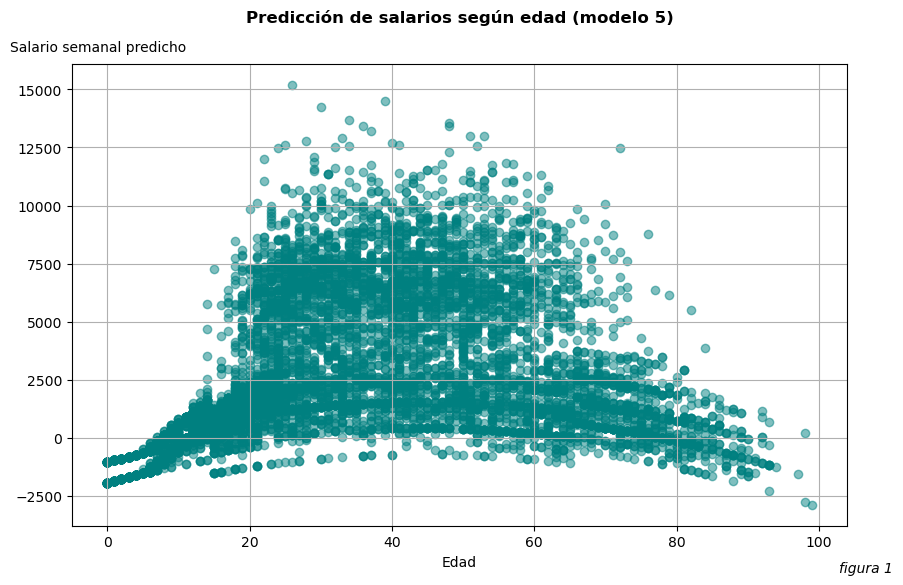

In [225]:
# Gráfico

import matplotlib.pyplot as plt

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de dispersión
ax.scatter(Test['CH06'], Y5_test_pred, alpha=0.5, color='teal')

# Etiquetas de los ejes
ax.set_xlabel('Edad')
ax.set_title('Predicción de salarios según edad (modelo 5)',fontweight='bold', pad=30)
ax.grid(True)

# Etiqueta del eje Y colocada arriba y horizontal
ax.set_ylabel('Salario semanal predicho',
              rotation=0,
              labelpad=60,
              horizontalalignment='left',
              verticalalignment='bottom')

# Coordenadas para moverla arriba del gráfico
ax.yaxis.set_label_coords(-0.08, 1.02)
ax.text(0.99, -0.1, "figura 1", transform=plt.gca().transAxes, fontstyle="italic")
plt.savefig("Figuras punto 4.png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show()



# C) Métodos de Clasificación y Performance

## Punto 5)

In [235]:
# Importo librerias
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [270]:
y_train=pd.concat([y04_train, y24_train], ignore_index=True)
y_train=np.array(y_train)
y_test=pd.concat([y04_test, y24_test], ignore_index=True)
y_test=np.array(y_test)

In [272]:
# Primero agregamos la columna de 1s y hacemos el ajuste
X_train=Training[['CH06','EDUC','CH04', 'SALARIO_SEMANAL']]

# Estimo:

# Ajustamos el clasificador con el metodo fit() 
log_reg = LogisticRegression(penalty=None).fit(X_train, y_train)

X_test=Test[['CH06','EDUC','CH04', 'SALARIO_SEMANAL']]
# con la muestra de testeo
y_test_pred_score = log_reg.predict_proba(X_test)[:,1]
y_test_pred_conf = (y_test_pred_score > 0.5).astype(int)
y_test_pred=log_reg.predict(X_test)

In [274]:
# Calculamos el accuracy de testeo: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy Test: %f' % accuracy)

Accuracy Test: 0.948528


In [276]:
# Imprimo la matriz de confusión
print(confusion_matrix(y_test, y_test_pred_conf))

[[8311    0]
 [ 451    0]]


In [278]:
# Conformo los valores que utilizo para el grafico
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_score)
# Area under curve
auc = roc_auc_score(y_test, y_test_pred) 
print('AUC: %.2f' % auc)


AUC: 0.50


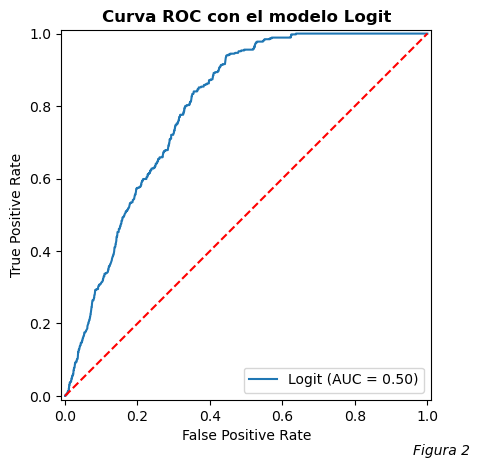

In [280]:
# Gráfico
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logit')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Curva ROC con el modelo Logit", fontweight='bold')
plt.text(0.95, -0.15, 'Figura 2', fontsize=10, style='italic', transform=plt.gca().transAxes)
plt.savefig("Figuras punto 5.1.logit.png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show() 

### KNN

In [283]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [285]:
y_test_pred_knn_score = knn.predict_proba(X_test)[:,1]

# Clasificación con p > 0.5
y_test_pred_knn_conf = (y_test_pred_knn_score > 0.5).astype(int)

y_test_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("La exactitud del modelo es: %.3f" %accuracy_knn)  

# Matriz de confusion
print(pd.crosstab(index=y_test, columns=y_test_pred_knn_conf))



La exactitud del modelo es: 0.934
col_0     0    1
row_0           
0      8127  184
1       392   59


AUC: 0.55



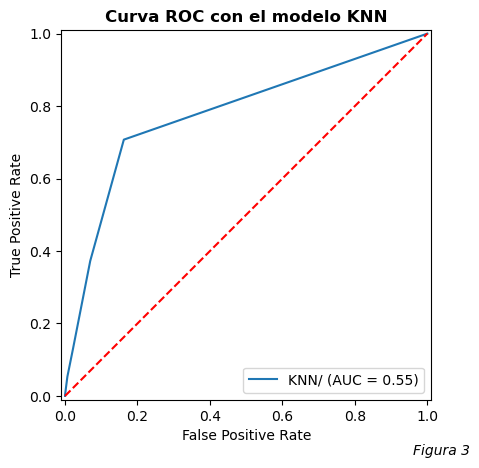

In [287]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_knn_score)

auc = roc_auc_score(y_test, y_test_pred_knn) 
print('AUC: %.2f' % auc)
print()
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='KNN/')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Curva ROC con el modelo KNN", fontweight='bold')
plt.text(0.95, -0.15, 'Figura 3', fontsize=10, style='italic', transform=plt.gca().transAxes)
plt.savefig("Figuras punto 5.2.KNN.png", bbox_inches='tight', dpi=300)   #GUARDO EL PNG
plt.show() 

# Punto 6)

In [290]:
X6=norespondieron[['CH06','EDUC','CH04', 'SALARIO_SEMANAL']].fillna(0)
y6=norespondieron['desocupado']
y6=np.array(y6)

In [292]:
# Utilizo la regresión logit, pues su accuracy de testeo es más alta
y6_pred= log_reg.predict(X6)

In [294]:
print('La cantidad de desocupados predecidos son:', y6_pred.sum())

La cantidad de desocupados predecidos son: 0


In [296]:
print('La cantidad de desocupados encuestados son:', y6.sum())

La cantidad de desocupados encuestados son: 0


In [298]:
print('La proporción de las personas que no respondieron pero son y se predijeron como desocupadas es de 1' )

La proporción de las personas que no respondieron pero son y se predijeron como desocupadas es de 1
